# Цифрларды жіктеу моделі

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import keras
from keras.datasets import mnist
from keras import Sequential
from keras import layers
import matplotlib.pyplot as plt

In [2]:
# from https://www.tensorflow.org/guide/gpu
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


### MNIST деректер жиынтығын жүктеу
Keras кейбір жиі қолданылатын деректер жиынтығымен, соның ішінде MNIST қолмен жазылған сандық деректер базасымен бірге жеткізіледі.

In [3]:
# from https://keras.io/datasets/#mnist-database-of-handwritten-digits
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = mnist.load_data()

Келесі қадам - ​​деректер жиынтығының мәндерін біздің модельге сәйкес формаға айналдыру.

Бұған белгілерді бинарлы класс матрицасына түрлендіру және сандық пиксел мәндерін қайта құру кіреді.

In [4]:
# from https://keras.io/getting-started/sequential-model-guide/
y_train = keras.utils.to_categorical(y_train_raw, num_classes=10, dtype="uint8")
y_test = keras.utils.to_categorical(y_test_raw, num_classes=10, dtype="uint8")

x_train = x_train_raw.reshape(60000,28,28,1)
x_test = x_test_raw.reshape(10000,28,28,1)

MatPlotLib көмегімен графикте бір цифрды қалай көрсетуге болады.


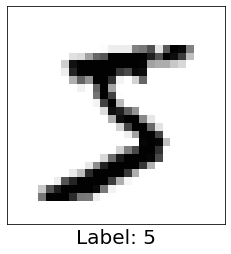

In [5]:
%matplotlib inline

def plot_digit(img_vals, label=None):
    # disable ticks/labels
    # https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.tick_params.html
    plt.tick_params(
        axis='both',
        which='both',
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False)
    plt.imshow([255 - i for i in img_vals], cmap='gray')
    if label is not None:
        # add label below the image
        plt.rcParams.update({'font.size': 20})
        plt.xlabel("Label: {}".format(label), fontsize="medium")
        plt.rcParams.update({'font.size': 15})
    plt.show()

plot_digit(x_train_raw[0], y_train_raw[0])

Мұнда модель құрастырылады. Мен моделім үшін конволюциялық нейрондық желіні қолдануды жөн көрдім, өйткені олар кескіндерді жіктеу мәселелерінде өте жақсы жұмыс істейді.

Негізгі идея - әр конволюциялық қабатта (Conv2D) кескіннің үстінен [ядро] (https://kk.wikipedia.org/wiki/Kernel_ (image_processing)) өтіп, көптеген әр түрлі мүмкіндіктер (мысалы, шеттер) шығарылады. . Мен екі конволюциялық қабатты қолданғандықтан, тағы бір кішігірім мүмкіндіктер жиынтығын шығару үшін кернал қайтадан осы белгілерге беріледі. Артқа көшіру кезінде нейрондық желі функциялардың 0-9 сандарымен қалай байланысты екенін анықтап, болжам жасай алады.

In [6]:
model = Sequential()

# pull out big features in the layer (large kernel)
model.add(layers.Conv2D(32, kernel_size=5, activation="relu", input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))

# pull out smaller features from these big features (small kernel)
model.add(layers.Conv2D(32, kernel_size=3, activation="relu"))
model.add(layers.Conv2D(64, kernel_size=3, activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))

# finally, a simple dense layer of neurons
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=18, batch_size=500)

Epoch 1/18
120/120 [==============================] - 14s 113ms/step - loss: 8.2162 - accuracy: 0.3705
Epoch 2/18
120/120 [==============================] - 13s 105ms/step - loss: 0.3596 - accuracy: 0.8906
Epoch 3/18
120/120 [==============================] - 13s 105ms/step - loss: 0.1988 - accuracy: 0.9387
Epoch 4/18
120/120 [==============================] - 13s 105ms/step - loss: 0.1459 - accuracy: 0.9564
Epoch 5/18
120/120 [==============================] - 13s 106ms/step - loss: 0.1115 - accuracy: 0.9664
Epoch 6/18
120/120 [==============================] - 13s 106ms/step - loss: 0.0980 - accuracy: 0.9702
Epoch 7/18
120/120 [==============================] - 13s 106ms/step - loss: 0.0883 - accuracy: 0.9728
Epoch 8/18
120/120 [==============================] - 13s 105ms/step - loss: 0.0796 - accuracy: 0.9753
Epoch 9/18
120/120 [==============================] - 13s 105ms/step - loss: 0.0680 - accuracy: 0.9792
Epoch 10/18
120/120 [==============================] - 13s 105ms/step - l

Тест жиынтығында модельді бағалаймыз.

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0222 - accuracy: 0.9926


[0.022194089367985725, 0.9926000237464905]

Үлгінің демонстрациясы ретінде бұл код әрбір цифр үшін модель жасаған қате болжамдардың жиілігін көрсететін штрих-диаграмма жасайды.

<BarContainer object of 10 artists>

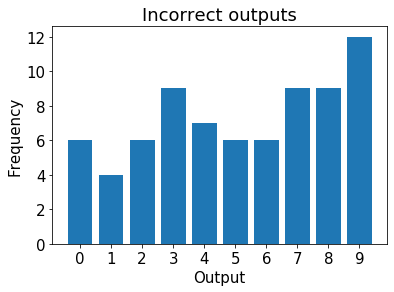

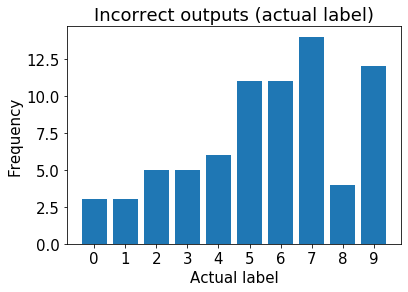

In [9]:
prediction_classes = model.predict_classes(x_test)

# initialize arrays
nums = np.arange(0, 10)
wrong_out_dist = np.zeros((10,))
wrong_out_label_dist = np.zeros((10,))

# compare predictions to actual labels
for i in range(len(prediction_classes)):
    if prediction_classes[i] != y_test_raw[i]:
        wrong_out_dist[prediction_classes[i]] += 1
        wrong_out_label_dist[y_test_raw[i]] += 1

# https://stackoverflow.com/questions/33203645/how-to-plot-a-histogram-using-matplotlib-in-python-with-a-list-of-data
# https://www.programcreek.com/python/example/56587/matplotlib.pyplot.title
plt.title("Incorrect outputs")
plt.xlabel("Output")
plt.ylabel("Frequency")
plt.bar(nums, wrong_out_dist, tick_label=nums)

plt.figure()
plt.title("Incorrect outputs (actual label)")
plt.xlabel("Actual label")
plt.ylabel("Frequency")
plt.bar(nums, wrong_out_label_dist, tick_label=nums)

Тағы бір демонстрация ретінде бұл код модельді жіктеу кезінде қиындық туғызған үш цифрды шығарады.

(бұл өте нашар салынған үш цифр болуы керек)

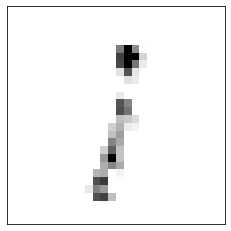

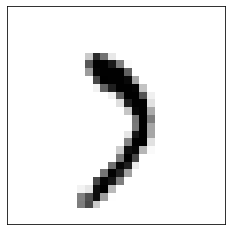

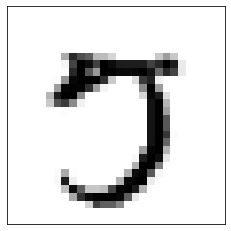

In [10]:
# get predictions for each digit in the test set
# (this differs from predict_classes, as this returns a probability distribution for each digit)
predictions = model.predict(x_test)
# get the highest prediction value for each digit (0-1 because of softmax)
confidence = [max(p) for p in predictions]
# get indexes of sorted confidence values (smallest to largest)
# a small max value from a probility distribution suggests uncertainty
confidence_sorted = np.argsort(confidence)

# plot those three digits
for i in range(3):
    plot_digit(x_test_raw[confidence_sorted[i]])

Сондай-ақ, қазір тестілік мәліметтерге аз уақытты жинап, жаттығулар жасай аламыз, себебі бұл мәліметтердің кішірек жиынтығы (60 000 кескіннің орнына 10000).

In [11]:
model.fit(x_test, y_test, epochs=3, batch_size=250)

Epoch 1/3
40/40 [==============================] - 2s 54ms/step - loss: 0.0477 - accuracy: 0.9851
Epoch 2/3
40/40 [==============================] - 2s 54ms/step - loss: 0.0532 - accuracy: 0.9830
Epoch 3/3
40/40 [==============================] - 2s 62ms/step - loss: 0.0407 - accuracy: 0.9870



Соңында, модельді дискіге сақтаңыз, оны кейіннен Flask серверінде оқып шығамыз.

In [12]:
# from https://machinelearningmastery.com/save-load-keras-deep-learning-models/
model.save("./flask/model.h5")

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0

Epoch 1/50
90/90 [==============================] - 14s 157ms/step - loss: 0.0467 - accuracy: 0.9853 - val_loss: 0.0145 - val_accuracy: 0.9950
Epoch 2/50
90/90 [==============================] - 12s 129ms/step - loss: 0.0387 - accuracy: 0.9877 - val_loss: 0.0135 - val_accuracy: 0.9953
Epoch 3/50
90/90 [==============================] - 12s 131ms/step - loss: 0.0355 - accuracy: 0.9885 - val_loss: 0.0149 - val_accuracy: 0.9953
Epoch 4/50
90/90 [==============================] - 12s 130ms/step - loss: 0.0344 - accuracy: 0.9889 - val_loss: 0.0142 - val_accuracy: 0.9957
Epoch 5/50
90/90 [==============================] - 12s 130ms/step - loss: 0.0319 - accuracy: 0.9896 - val_loss: 0.0141 - val_accuracy: 0.9948
Epoch 6/50
90/90 [==============================] - 12s 132ms/step - loss: 0.0308 - accuracy: 0.9904 - val_loss: 0.0168 - val_accuracy: 0.9945
Epoch 7/50
90/90 [==============================] - 12s 130ms/step - loss: 0.0325 - accuracy: 0.9893 - val_loss: 0.0146 - val_accuracy: 0.9948

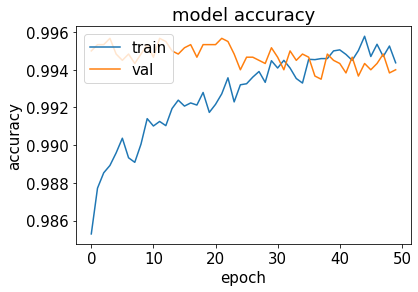

In [13]:
import keras
from matplotlib import pyplot as plt
history = model.fit(x_train, y_train,validation_split = 0.1, epochs=50, batch_size=600)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

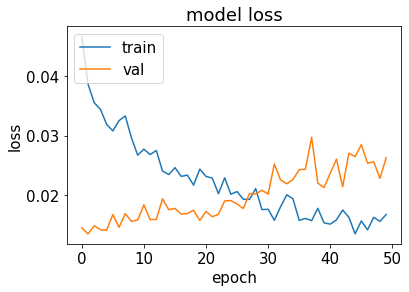

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

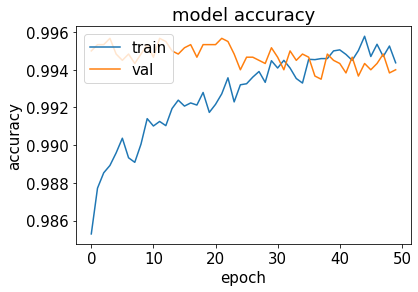

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()